# Classification Evaluation Metrics

1. Accuray
2. Area under RCC Curve
3. Confusion Matrix
4. Classification Report

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 100

### Accuracy :- 

In [31]:
# Generating a basic score :- 

np.random.seed(38)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

hd = pd.read_csv("heart-disease.csv")

X = hd.drop("target", axis=1)
y = hd['target']

clf = RandomForestClassifier()

cross_val_scr = np.mean(cross_val_score(clf, X, y, cv=5))

print(f'The Cross Validated Accuracy is :- {cross_val_scr * 100:.2f}%')

# since the scoring method is not passed, for cross_val_score, the default scoring method would be mean

The Cross Validated Accuracy is :- 81.84%


### Area under Receiver Operating Characteristic Curve OR (AUC / Area under ROC Curve)

ROC curves are a comparison of a model's true positive rate (TPR) and false positive rate (FPR)

* true positive - model predicts 1 when truth is 1
* false positive - model predicts 1 when truth is 0
* true negative - model predicts 0 when truth is 0
* false negative - model predicts 0 when truth is 1

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.8 , 0.2 ],
       [0.93, 0.07],
       [0.37, 0.63],
       [0.29, 0.71],
       [0.29, 0.71],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.71, 0.29],
       [0.64, 0.36],
       [0.1 , 0.9 ]])

In [34]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.2 , 0.07, 0.63, 0.71, 0.71, 0.92, 0.99, 0.29, 0.36, 0.9 ])

In [35]:
# calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.31034483, 0.31034483, 0.34482759,
       0.37931034, 0.55172414, 0.62068966, 0.72413793, 0.75862069,
       0.82758621, 0.86206897, 0.96551724, 1.        ])

In [36]:
# plotting the ROC curve

def plot_roc_curve(fpr, tpr): 
    """
        Plots the ROC curve given the False Positive Rate -> fpr and True Positive Rate -> tpr for a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # plot the baseline 
    plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="Guessing")

    # Customising the plot
    plt.xlabel("True Positive Rate (TPR)")
    plt.ylabel("False Positive Rate (FPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.figure(figsize=(2, 2))

    plt.show()

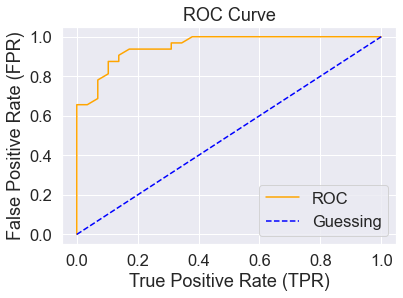

<Figure size 144x144 with 0 Axes>

In [37]:
plot_roc_curve(fpr, tpr)

In [38]:
# AUC score or Area Under the Curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9525862068965517

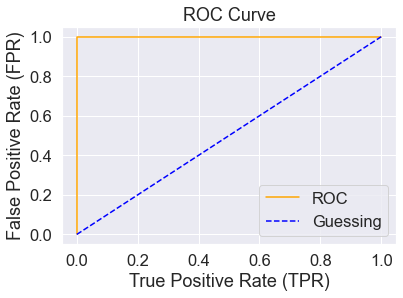

<Figure size 144x144 with 0 Axes>

In [39]:
# plotting perfect ROC curve :- 
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

### Confusion Matrix

A confusion matrix is a quick way to compare the labels the labels a model predicts and the labels that the model was supposed to predict.

In essence, giving you the idea of where the model is getting confused.

In [40]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[24,  5],
       [ 2, 30]], dtype=int64)

In [41]:
# visualising the confusion matrix with pd.crosstab

pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,2,30


In [42]:
81 + 28 + 15 + 118

242

In [43]:
len(y_preds)

61

<AxesSubplot:>

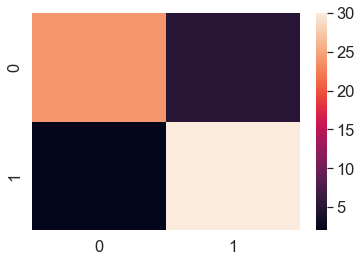

In [44]:
# visualising the confusion matrix with seaborn

import seaborn as sns
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

In [45]:
clf

RandomForestClassifier()

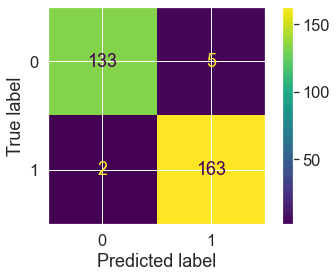

In [46]:
# NEW WAY --> Using sklearn library

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

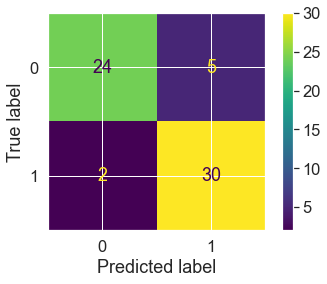

In [47]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### Classification Report

In [48]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [50]:
y_new_preds = clf.predict(X_test)

In [51]:
len(y_new_preds)

61